Contents

1. Importing libraries and datasets
2. Data Wrangling, Cleaning, & Subsetting
3. Exporting Data Set
4. Time-series analysis: decomposition
5. Testing for stationarity
6. Stationarizing Our Data

# 1. Importing Libraries and Datasets

In [1]:
# Importing Libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

/Users/danioprea/PycharmProjects/Coffee_Quality_Data_Analysis/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Set path

path = r'/Users/danioprea/Desktop/Data Analytics/Coffee Quality Analysis - Dani Oprea'

In [3]:
# Import Coffee_domestic_consumption with pandas

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Coffee_domestic_consumption.csv'))

In [4]:
df.head(50)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000
5,Indonesia,Robusta/Arabica,74520000,76800000,79140000,81540000,84000000,86580000,89160000,91920000,...,220020000,234000000,255000000,265020000,273000000,279000000,285000000,288000000,288360000,4920480000
6,Madagascar,Robusta,21000000,18000000,21000000,21600000,9999960,10020000,10020000,10020000,...,27000000,25800000,24600000,23400000,22200000,21600000,21900000,22500000,22500000,588705960
7,Malawi,Arabica,120000,120000,120000,120000,120000,120000,120000,120000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,2340000
8,Papua New Guinea,Arabica/Robusta,180000,180000,180000,120000,120000,120000,120000,120000,...,74160,102660,122340,115440,108000,120000,120000,120000,120000,3608400
9,Paraguay,Arabica,900000,900000,900000,1200000,1200000,1200000,1200000,1200000,...,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,35100000


In [5]:
df.shape

(55, 33)

# 2. Data Wrangling, Cleaning, & Subsetting

In [6]:
# Drop the coffee type and total domestic consumption columns

df = df.drop(['Coffee type','Total_domestic_consumption'], axis=1)

In [7]:
df.head(50)

,Country,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,Angola,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,1800000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000
1,Bolivia (Plurinational State of),1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,1980000,...,2850000,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000
2,Brazil,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,732000000,...,1147920000,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000
3,Burundi,120000,96000,102000,114600,120000,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000
4,Ecuador,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,18000000,...,9000000,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000
5,Indonesia,74520000,76800000,79140000,81540000,84000000,86580000,89160000,91920000,94680000,...,199980000,220020000,234000000,255000000,265020000,273000000,279000000,285000000,288000000,288360000
6,Madagascar,21000000,18000000,21000000,21600000,9999960,10020000,10020000,10020000,10020000,...,28020000,27000000,25800000,24600000,23400000,22200000,21600000,21900000,22500000,22500000
7,Malawi,120000,120000,120000,120000,120000,120000,120000,120000,120000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
8,Papua New Guinea,180000,180000,180000,120000,120000,120000,120000,120000,60000,...,85800,74160,102660,122340,115440,108000,120000,120000,120000,120000
9,Paraguay,900000,900000,900000,1200000,1200000,1200000,1200000,1200000,1200000,...,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000


#### Transposing Our Dataframe

We're going to transpose this dataframe so that the date columns become rows

In [8]:
df_t = df.T

In [9]:
df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Country,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,900000,...,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,900000,...,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,900000,...,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,1200000,...,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0


In [10]:
# We'll reset the index of the dataframe

df_t = df_t.reset_index()

In [11]:
df_t.head()

,index,0,1,2,3,4,5,6,7,8,...,45,46,47,48,49,50,51,52,53,54
0,Country,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1,1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,...,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
2,1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,...,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
3,1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,...,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
4,1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,...,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0


In [12]:
# Update the headers

new_header = df_t.iloc[0]

In [13]:
new_header

index                             Country
0                                  Angola
1        Bolivia (Plurinational State of)
2                                  Brazil
3                                 Burundi
4                                 Ecuador
5                               Indonesia
6                              Madagascar
7                                  Malawi
8                        Papua New Guinea
9                                Paraguay
10                                   Peru
11                                 Rwanda
12                            Timor-Leste
13                               Zimbabwe
14                                  Congo
15                                   Cuba
16                     Dominican Republic
17                                  Haiti
18                            Philippines
19                               Tanzania
20                                 Zambia
21                               Cameroon
22               Central African R

In [14]:
# Remove old header

df_t_new = df_t[1:]

In [15]:
df_t_new

,index,0,1,2,3,4,5,6,7,8,...,45,46,47,48,49,50,51,52,53,54
1,1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,...,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
2,1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,...,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
3,1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,...,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
4,1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,...,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0
5,1994/95,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,...,4600020,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0
6,1995/96,600000,1830000,606000000,120000,21000000,86580000,10020000,120000,120000,...,4600020,480000,1200000,25020000,60000,840000,4800000,57747600,16910700,0
7,1996/97,1200000,1890000,660000000,120000,18000000,89160000,10020000,120000,120000,...,4600020,480000,1200000,19980000,60000,840000,4800000,60190800,17850960,0
8,1997/98,2400000,1950000,690000000,120000,18000000,91920000,10020000,120000,120000,...,4836900,300000,1200000,23400000,60000,840000,6071400,62736599,18843480,0
9,1998/99,1800000,1980000,732000000,120000,18000000,94680000,10020000,120000,60000,...,4020000,300000,1800000,25980000,120000,840000,6960000,65390400,19891140,0
10,1999/00,1200000,2040000,762000000,120000,13800000,97560000,3360000,60000,120000,...,4020000,300000,1800000,25980000,120000,840000,7140000,68156400,21000000,0


In [16]:
#Now, we just have to set the new_header variable as the new header of df_t_new. We do that with this:

df_t_new.columns = new_header

In [17]:
df_t_new

,Country,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1,1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,...,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
2,1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,...,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
3,1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,...,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
4,1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,...,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0
5,1994/95,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,...,4600020,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0
6,1995/96,600000,1830000,606000000,120000,21000000,86580000,10020000,120000,120000,...,4600020,480000,1200000,25020000,60000,840000,4800000,57747600,16910700,0
7,1996/97,1200000,1890000,660000000,120000,18000000,89160000,10020000,120000,120000,...,4600020,480000,1200000,19980000,60000,840000,4800000,60190800,17850960,0
8,1997/98,2400000,1950000,690000000,120000,18000000,91920000,10020000,120000,120000,...,4836900,300000,1200000,23400000,60000,840000,6071400,62736599,18843480,0
9,1998/99,1800000,1980000,732000000,120000,18000000,94680000,10020000,120000,60000,...,4020000,300000,1800000,25980000,120000,840000,6960000,65390400,19891140,0
10,1999/00,1200000,2040000,762000000,120000,13800000,97560000,3360000,60000,120000,...,4020000,300000,1800000,25980000,120000,840000,7140000,68156400,21000000,0


#### Renaming Columns

In [18]:
# Update country column name to Date

df_t_new = df_t_new.rename(columns={'Country':'Date', })

In [19]:
df_t_new

,Date,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1,1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,...,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
2,1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,...,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
3,1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,...,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
4,1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,...,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0
5,1994/95,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,...,4600020,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0
6,1995/96,600000,1830000,606000000,120000,21000000,86580000,10020000,120000,120000,...,4600020,480000,1200000,25020000,60000,840000,4800000,57747600,16910700,0
7,1996/97,1200000,1890000,660000000,120000,18000000,89160000,10020000,120000,120000,...,4600020,480000,1200000,19980000,60000,840000,4800000,60190800,17850960,0
8,1997/98,2400000,1950000,690000000,120000,18000000,91920000,10020000,120000,120000,...,4836900,300000,1200000,23400000,60000,840000,6071400,62736599,18843480,0
9,1998/99,1800000,1980000,732000000,120000,18000000,94680000,10020000,120000,60000,...,4020000,300000,1800000,25980000,120000,840000,6960000,65390400,19891140,0
10,1999/00,1200000,2040000,762000000,120000,13800000,97560000,3360000,60000,120000,...,4020000,300000,1800000,25980000,120000,840000,7140000,68156400,21000000,0


In [20]:
# Overwrite df with df_t_new for ease of coding moving forward

df = df_t_new

In [21]:
df

,Date,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1,1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,...,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
2,1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,...,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
3,1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,...,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
4,1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,...,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0
5,1994/95,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,...,4600020,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0
6,1995/96,600000,1830000,606000000,120000,21000000,86580000,10020000,120000,120000,...,4600020,480000,1200000,25020000,60000,840000,4800000,57747600,16910700,0
7,1996/97,1200000,1890000,660000000,120000,18000000,89160000,10020000,120000,120000,...,4600020,480000,1200000,19980000,60000,840000,4800000,60190800,17850960,0
8,1997/98,2400000,1950000,690000000,120000,18000000,91920000,10020000,120000,120000,...,4836900,300000,1200000,23400000,60000,840000,6071400,62736599,18843480,0
9,1998/99,1800000,1980000,732000000,120000,18000000,94680000,10020000,120000,60000,...,4020000,300000,1800000,25980000,120000,840000,6960000,65390400,19891140,0
10,1999/00,1200000,2040000,762000000,120000,13800000,97560000,3360000,60000,120000,...,4020000,300000,1800000,25980000,120000,840000,7140000,68156400,21000000,0


#### Updating The Date Column

We want to update the dates to reflect just one year, not a range of years

In [22]:
df.dtypes

0
Date                                object
Angola                              object
Bolivia (Plurinational State of)    object
Brazil                              object
Burundi                             object
Ecuador                             object
Indonesia                           object
Madagascar                          object
Malawi                              object
Papua New Guinea                    object
Paraguay                            object
Peru                                object
Rwanda                              object
Timor-Leste                         object
Zimbabwe                            object
Congo                               object
Cuba                                object
Dominican Republic                  object
Haiti                               object
Philippines                         object
Tanzania                            object
Zambia                              object
Cameroon                            object
Central A

In [23]:
# Remove everything after "/" in the Date column

df['Date'] = df['Date'].str.split('/').str[0]

In [24]:
df.head(50)

,Date,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1,1990,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,...,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
2,1991,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,...,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
3,1992,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,...,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
4,1993,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,...,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0
5,1994,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,...,4600020,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0
6,1995,600000,1830000,606000000,120000,21000000,86580000,10020000,120000,120000,...,4600020,480000,1200000,25020000,60000,840000,4800000,57747600,16910700,0
7,1996,1200000,1890000,660000000,120000,18000000,89160000,10020000,120000,120000,...,4600020,480000,1200000,19980000,60000,840000,4800000,60190800,17850960,0
8,1997,2400000,1950000,690000000,120000,18000000,91920000,10020000,120000,120000,...,4836900,300000,1200000,23400000,60000,840000,6071400,62736599,18843480,0
9,1998,1800000,1980000,732000000,120000,18000000,94680000,10020000,120000,60000,...,4020000,300000,1800000,25980000,120000,840000,6960000,65390400,19891140,0
10,1999,1200000,2040000,762000000,120000,13800000,97560000,3360000,60000,120000,...,4020000,300000,1800000,25980000,120000,840000,7140000,68156400,21000000,0


#### Update types of all other columns to int

In [25]:
df[['Angola','Bolivia (Plurinational State of)', 'Brazil', 'Burundi', 'Ecuador', 'Indonesia', 'Madagascar', 'Malawi', 'Papua New Guinea', 'Paraguay', 'Peru', 'Rwanda', 'Timor-Leste', 'Zimbabwe', 'Congo', 'Cuba', 'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania', 'Zambia', 'Cameroon', 'Central African Republic', 'Colombia', 'Costa Rica', "Côte d'Ivoire", 'Democratic Republic of Congo', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'India', 'Jamaica', 'Kenya', "Lao People's Democratic Republic", 'Liberia', 'Mexico', 'Nepal', 'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone', 'Sri Lanka', 'Thailand', 'Togo', 'Trinidad & Tobago', 'Uganda', 'Venezuela', 'Viet Nam', 'Yemen']] = df[['Angola','Bolivia (Plurinational State of)', 'Brazil', 'Burundi', 'Ecuador', 'Indonesia', 'Madagascar', 'Malawi', 'Papua New Guinea', 'Paraguay', 'Peru', 'Rwanda', 'Timor-Leste', 'Zimbabwe', 'Congo', 'Cuba', 'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania', 'Zambia', 'Cameroon', 'Central African Republic', 'Colombia', 'Costa Rica', "Côte d'Ivoire", 'Democratic Republic of Congo', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'India', 'Jamaica', 'Kenya', "Lao People's Democratic Republic", 'Liberia', 'Mexico', 'Nepal', 'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone', 'Sri Lanka', 'Thailand', 'Togo', 'Trinidad & Tobago', 'Uganda', 'Venezuela', 'Viet Nam', 'Yemen']].astype(int)

In [26]:
df.dtypes

0
Date                                object
Angola                               int64
Bolivia (Plurinational State of)     int64
Brazil                               int64
Burundi                              int64
Ecuador                              int64
Indonesia                            int64
Madagascar                           int64
Malawi                               int64
Papua New Guinea                     int64
Paraguay                             int64
Peru                                 int64
Rwanda                               int64
Timor-Leste                          int64
Zimbabwe                             int64
Congo                                int64
Cuba                                 int64
Dominican Republic                   int64
Haiti                                int64
Philippines                          int64
Tanzania                             int64
Zambia                               int64
Cameroon                             int64
Central A

#### Add a new column 'Worldwide Totals' that adds all the columns together

In [27]:
# Sum all the columns

df['Worldwide Totals'] = df.sum(axis=1, numeric_only=True)

In [28]:
df.head(50)

,Date,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,...,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen,Worldwide Totals
1,1990,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,...,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0,1170552660
2,1991,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,...,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0,1213685820
3,1992,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,...,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0,1257087120
4,1993,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,...,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0,1265874360
5,1994,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,...,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0,1281609960
6,1995,600000,1830000,606000000,120000,21000000,86580000,10020000,120000,120000,...,480000,1200000,25020000,60000,840000,4800000,57747600,16910700,0,1356154320
7,1996,1200000,1890000,660000000,120000,18000000,89160000,10020000,120000,120000,...,480000,1200000,19980000,60000,840000,4800000,60190800,17850960,0,1410755400
8,1997,2400000,1950000,690000000,120000,18000000,91920000,10020000,120000,120000,...,300000,1200000,23400000,60000,840000,6071400,62736599,18843480,0,1456262399
9,1998,1800000,1980000,732000000,120000,18000000,94680000,10020000,120000,60000,...,300000,1800000,25980000,120000,840000,6960000,65390400,19891140,0,1506995580
10,1999,1200000,2040000,762000000,120000,13800000,97560000,3360000,60000,120000,...,300000,1800000,25980000,120000,840000,7140000,68156400,21000000,0,1544472300


In [29]:
df.dtypes

0
Date                                object
Angola                               int64
Bolivia (Plurinational State of)     int64
Brazil                               int64
Burundi                              int64
Ecuador                              int64
Indonesia                            int64
Madagascar                           int64
Malawi                               int64
Papua New Guinea                     int64
Paraguay                             int64
Peru                                 int64
Rwanda                               int64
Timor-Leste                          int64
Zimbabwe                             int64
Congo                                int64
Cuba                                 int64
Dominican Republic                   int64
Haiti                                int64
Philippines                          int64
Tanzania                             int64
Zambia                               int64
Cameroon                             int64
Central A

In [30]:
# Check for missing values (you shouldn't have any)

df.isnull().sum() 

0
Date                                0
Angola                              0
Bolivia (Plurinational State of)    0
Brazil                              0
Burundi                             0
Ecuador                             0
Indonesia                           0
Madagascar                          0
Malawi                              0
Papua New Guinea                    0
Paraguay                            0
Peru                                0
Rwanda                              0
Timor-Leste                         0
Zimbabwe                            0
Congo                               0
Cuba                                0
Dominican Republic                  0
Haiti                               0
Philippines                         0
Tanzania                            0
Zambia                              0
Cameroon                            0
Central African Republic            0
Colombia                            0
Costa Rica                          0
Côte d'Ivo

In [31]:
# Check for duplicates

dups = df.duplicated()
dups.sum()

0

No dups.

#### Plot the data

In [32]:
# Create a subset of just the datetime and worldwide totals columns

columns = ['Date', 'Worldwide Totals']
df_sub = pd.DataFrame(df, columns=columns)

In [33]:
df_sub.head()

,Date,Worldwide Totals
1,1990,1170552660
2,1991,1213685820
3,1992,1257087120
4,1993,1265874360
5,1994,1281609960


In [34]:
# Set the "Date" column as the index

df_sub['datetime'] = pd.to_datetime(df_sub['Date'])
df_sub = df_sub.set_index('datetime')
df_sub.drop(['Date'], axis=1, inplace=True)
df_sub.head()

,Worldwide Totals
datetime,
1990-01-01,1170552660
1991-01-01,1213685820
1992-01-01,1257087120
1993-01-01,1265874360
1994-01-01,1281609960


In [35]:
df_sub.columns

Index(['Worldwide Totals'], dtype='object')

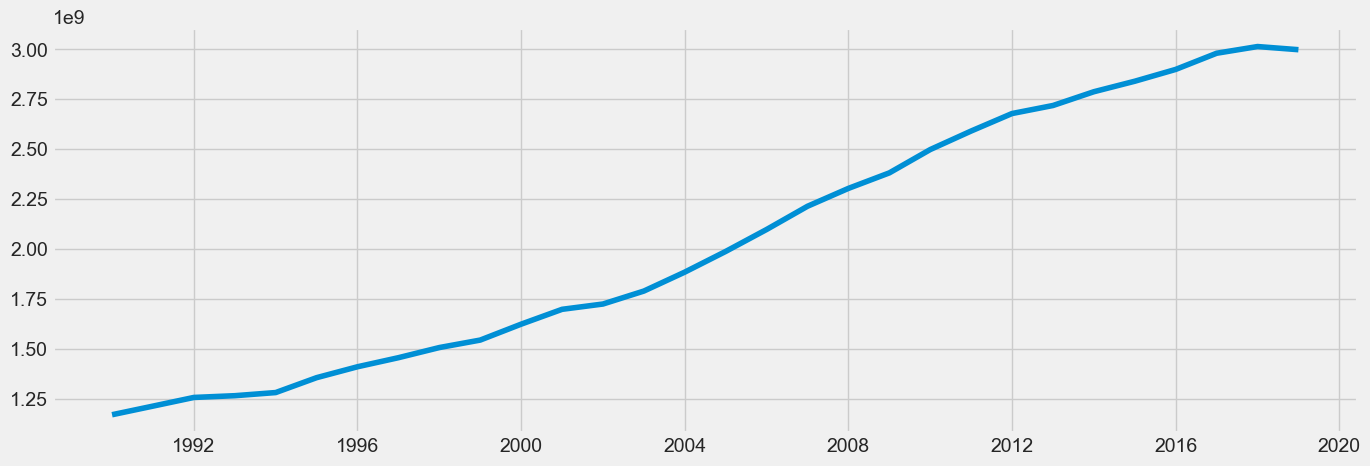

In [36]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(df_sub)

# 3. Exporting Data Set

In [37]:
# Export our dataframe

df_sub.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'coffee_consumption_final.pkl'))

# 4. Time-series analysis: decomposition

In [96]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [97]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

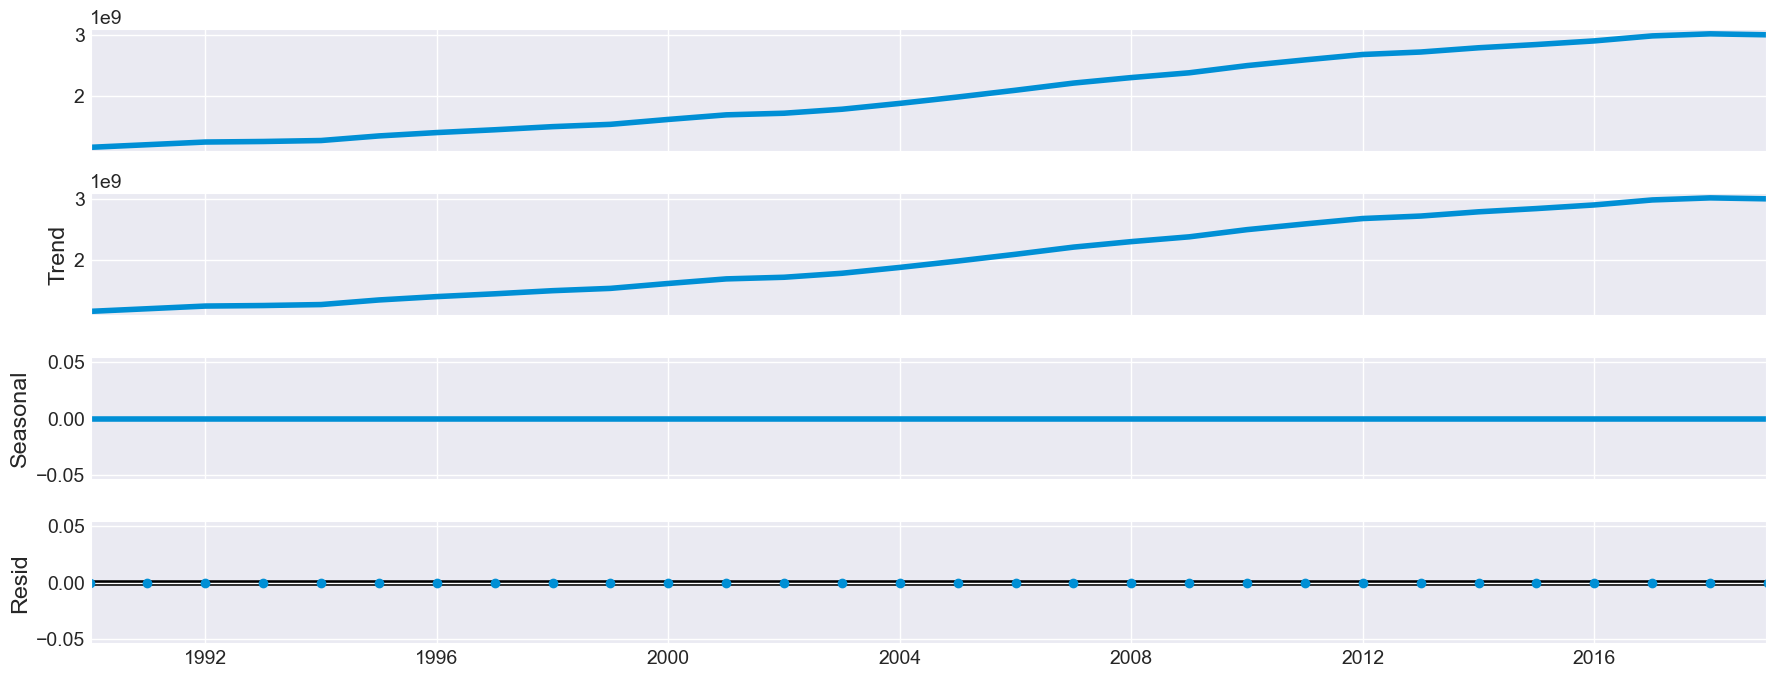

In [98]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Decomposition Analysis

The trend in the chart above looks like it is rising over the years. This means that coffee production has grown since 1990. We also have no seasonality since we're looking at year data, not monthly data. We have no noise either in our residual.

# 5. Testing for stationarity

In [99]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['Worldwide Totals'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.701080
p-value                         0.846470
Number of Lags Used             1.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


#### Dickey-Fuller Test Analysis

Unfortunately, it looks like our test statistic is larger than all of our critical values. This means that our data is non-stationary.

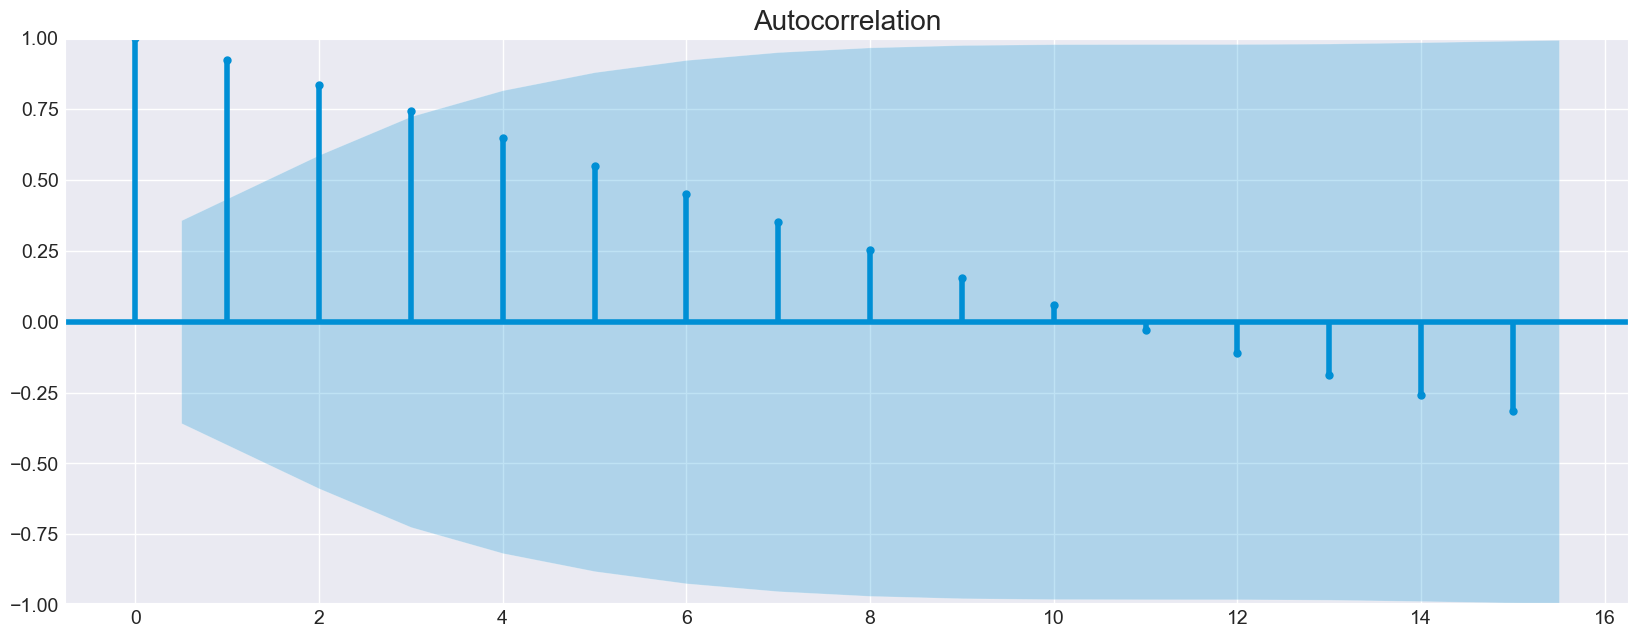

In [113]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_sub)
plt.show()

# 6. Stationarizing Our Data

In [100]:
# Differencing our subset

data_diff = df_sub - df_sub.shift(1)

In [101]:
# Removing the missing values that came about from the differencing

data_diff.dropna(inplace = True)

In [102]:
data_diff.head()

,Worldwide Totals
datetime,
1991-01-01,43133160.0
1992-01-01,43401300.0
1993-01-01,8787240.0
1994-01-01,15735600.0
1995-01-01,74544360.0


In [103]:
data_diff.columns

Index(['Worldwide Totals'], dtype='object')

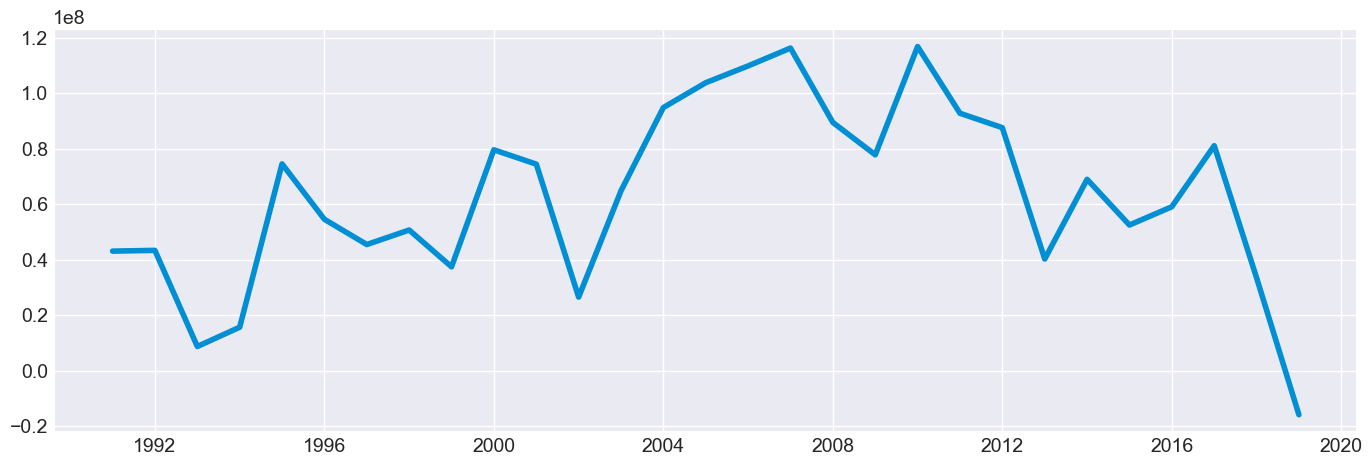

In [104]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [105]:
# Run the dickey-fuller test again on the differenced dataframe

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.027036
p-value                         0.274846
Number of Lags Used             0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


Our test statistic is still larger than our critical values, so we will difference again

In [106]:
data_diff_1 = data_diff - data_diff.shift(1)

In [107]:
data_diff_1.dropna(inplace=True)

In [108]:
data_diff_1.head()

,Worldwide Totals
datetime,
1992-01-01,268140.0
1993-01-01,-34614060.0
1994-01-01,6948360.0
1995-01-01,58808760.0
1996-01-01,-19943280.0


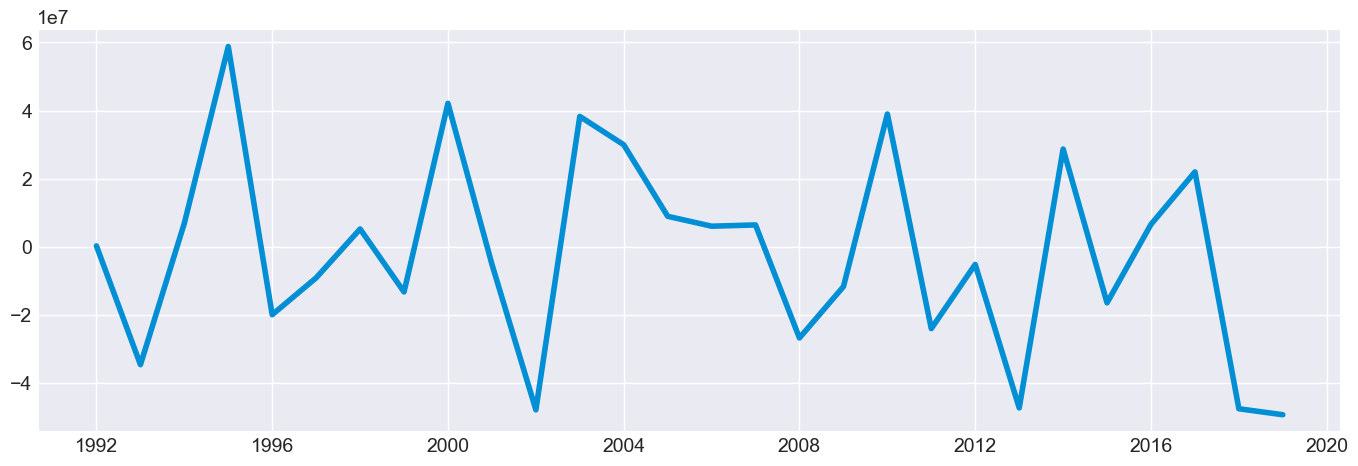

In [109]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_1)

In [110]:
# Run the dickey-fuller test again on the differenced dataframe

dickey_fuller(data_diff_1)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.525006
p-value                         0.000002
Number of Lags Used             0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


Now our test statistic is finally smaller than all of our critical values! Our data is now stationary!

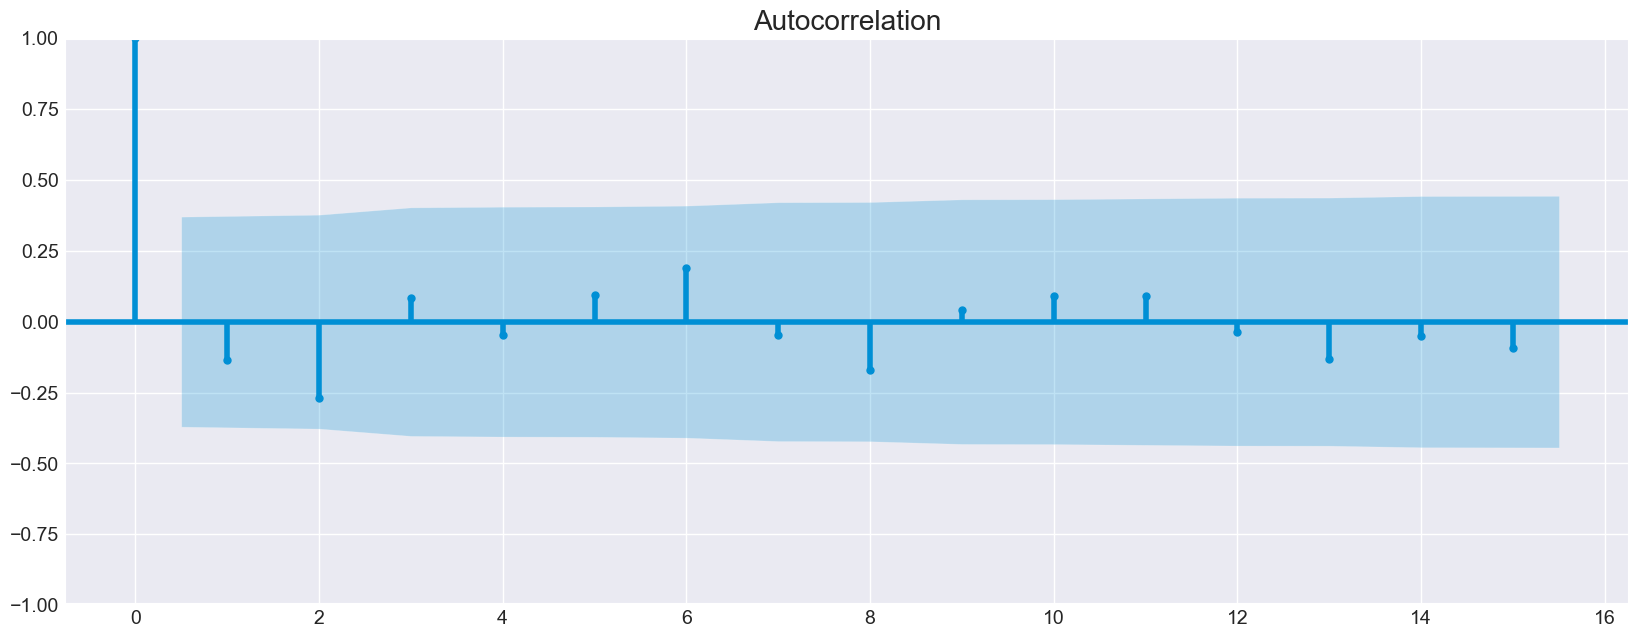

In [210]:
# Plot the autocorrelations to double-check our stationarity

plot_acf(data_diff_1)
plt.show()